<a href="https://colab.research.google.com/github/sanjanalad99/BCC/blob/main/NEWBCP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Importing the libraries

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F


2.Downloading the testing and training dataset

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))]
    )
trainset = torchvision.datasets.MNIST(
    root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

In [ ]:
testset = torchvision.datasets.MNIST(
    root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=50,
                                         shuffle=False, num_workers=2)

3. Visualising the training images which will be used as an input 

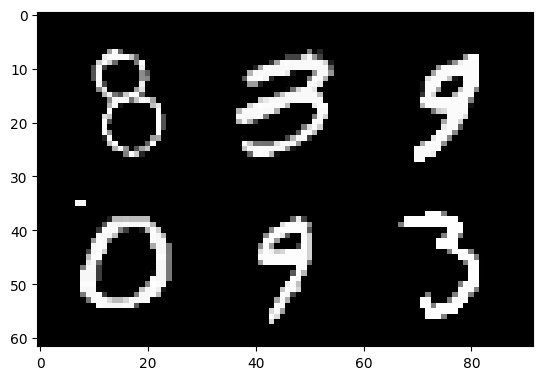

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# functions to change tensor to numpy image
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
# show images
imshow(torchvision.utils.make_grid(images[:6], nrow=3))


4.Building the CNN

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")
class NumClassifyNet(nn.Module):
  def __init__(self):
    super(NumClassifyNet, self).__init__()
    # 1 input image channel, 16 output channels, 5X5 square convolutional kernels
    self.conv1 = nn.Conv2d(1, 16, kernel_size=5)
    self.conv2 = nn.Conv2d(16, 32, kernel_size=5)
    self.pool = nn.MaxPool2d(2, 2)
    self.fc1 = nn.Linear(512, 120)
    self.fc2 = nn.Linear(120, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, self.flat_features(x))
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

  def flat_features(self, x):
    size = x.size()[1:]
    num_features = 1
    for s in size:
      num_features *= s
    return num_features

net = NumClassifyNet()
net = net.to(device)

5. Training the model

epoch 1 loss 0.002302656888961792


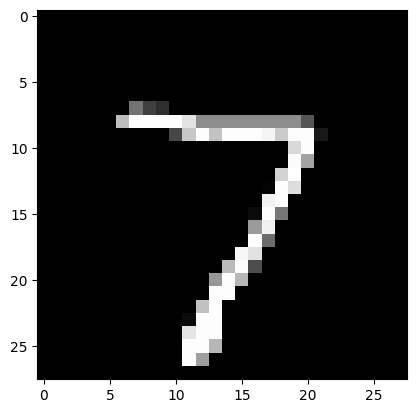

Predicted :  t e n s o r ( 6 )


epoch 2 loss 0.002251513957977295


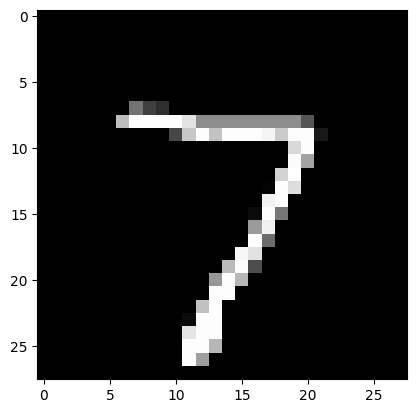

Predicted :  t e n s o r ( 1 )


epoch 3 loss 0.0020335984230041505


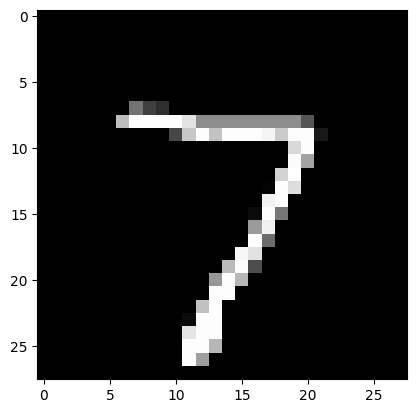

Predicted :  t e n s o r ( 7 )


epoch 4 loss 0.0013985613584518433


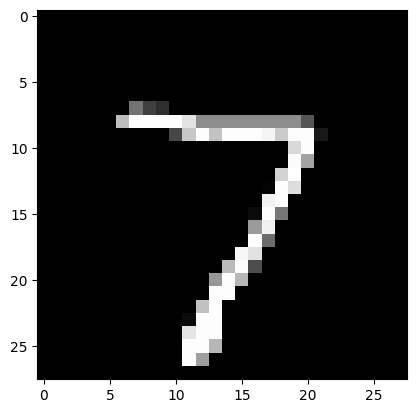

Predicted :  t e n s o r ( 7 )


epoch 5 loss 0.0006090015172958374


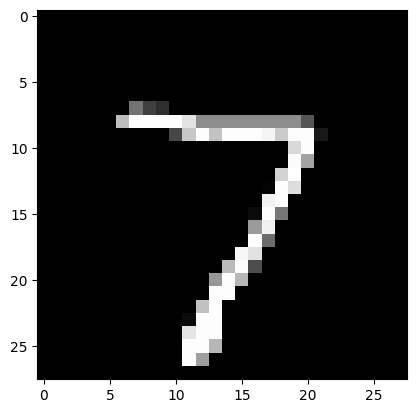

Predicted :  t e n s o r ( 7 )


epoch 6 loss 0.0006348575353622436


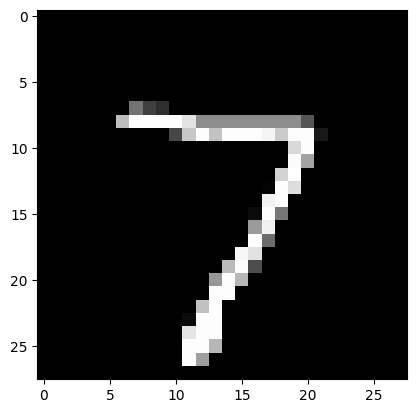

Predicted :  t e n s o r ( 7 )


epoch 7 loss 0.0003887002468109131


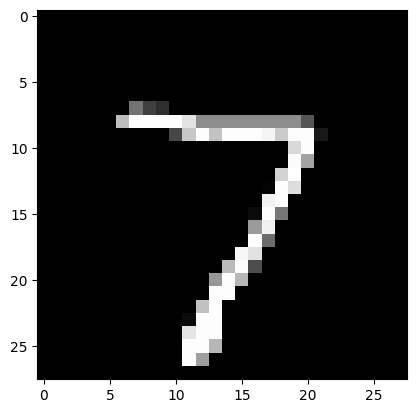

Predicted :  t e n s o r ( 7 )


epoch 8 loss 0.0001853085160255432


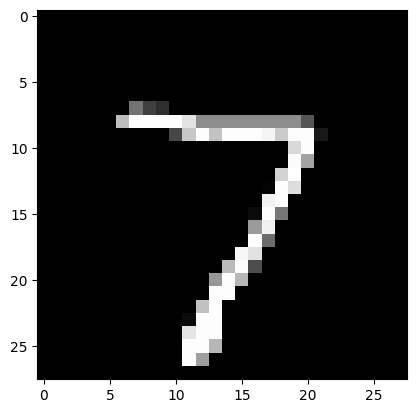

Predicted :  t e n s o r ( 7 )


epoch 9 loss 0.00039973175525665286


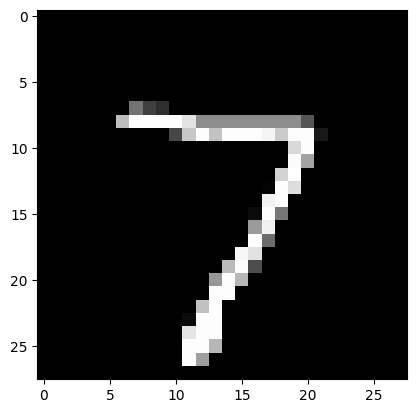

Predicted :  t e n s o r ( 7 )


epoch 10 loss 0.0002028951197862625


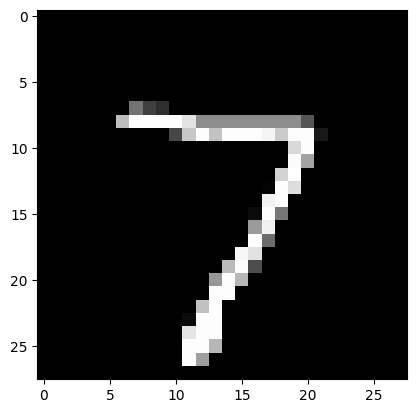

Predicted :  t e n s o r ( 7 )
Training finished


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001)
test_data_iter = iter(testloader)
test_images, test_labels = next(test_data_iter)
for epoch in range(10):
  running_loss = 0
  for i, data in enumerate(trainloader, 0):
    input_imgs, labels = data
    optimizer.zero_grad()
    input_imgs = input_imgs.to(device)
    labels = labels.to(device)
    outputs = net(input_imgs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    if i % 1000 == 0:
      print('epoch', epoch+1, 'loss', running_loss/1000)
      imshow(torchvision.utils.make_grid(test_images[0].detach()))
      test_out = net(test_images.to(device))
      _, predicted_out = torch.max(test_out, 1)
      print('Predicted : ', ' '.join('%5s' % predicted_out[0]))
print('Training finished')

6. Mounting Colab to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


7. Importing the OS environment 

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/kaggle"


8. Downloading the data

In [ ]:
os.chdir('../content/gdrive/MyDrive/kaggle')
!kaggle datasets download -d paultimothymooney/breast-histopathology-images


100% 3.09G/3.10G [00:49<00:00, 122MB/s]
100% 3.10G/3.10G [00:49<00:00, 67.5MB/s]


9.Building the network and converting images to tensor

In [ ]:
import torch
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split
import torch.optim as optim
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
data_dir = "/content/gdrive/MyDrive"
folder_name = "kaggle"
image_folders = os.path.join(data_dir, folder_name)

transform = transforms.Compose([transforms.Resize((50, 50)), transforms.ToTensor()])
images = []
for file in os.listdir(image_folders):
    try:
      images.append(ImageFolder(os.path.join(image_folders, file), transform=transform))
    except:
      print(file)
datasets = torch.utils.data.ConcatDataset(images)

kaggle.json
breast-histopathology-images.zip


10. Finding the number of samples in each class

In [ ]:
i=0
for dataset in datasets.datasets:
    if i==0:
        result = Counter(dataset.targets)
        i += 1
    else:
        result += Counter(dataset.targets)

result = dict(result)
print("""Total Number of Images for each Class:
    Class 0 (No Breast Cancer): {}
    Class 1 (Breast Cancer present): {}""".format(result[0], result[1]))

Total Number of Images for each Class:
    Class 0 (No Breast Cancer): 4097
    Class 1 (Breast Cancer present): 737


11. Splitting the dataset - 25% of testing set and 75% of training set

In [ ]:
random_seed = 42
torch.manual_seed(random_seed)

test_size = int(0.25*(result[0]+result[1]))
print(test_size)
train_size = len(datasets) - test_size
train_dataset, test_dataset = random_split(datasets, [train_size, test_size])
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=128,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=64,
                                         shuffle=False, num_workers=2)

1208


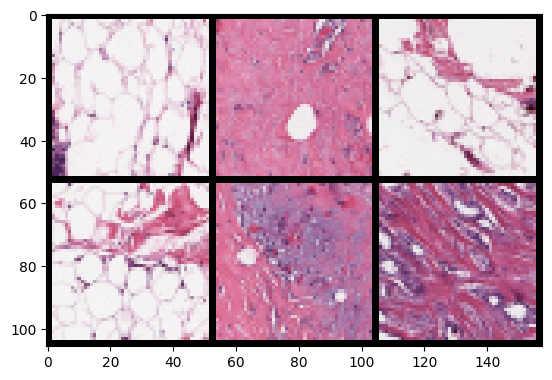

tensor([0, 0, 0, 0, 0, 1])

In [ ]:
# functions to show an image

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
# show images
imshow(torchvision.utils.make_grid(images[:6], nrow=3))
# show labels
labels[:6]

12. Using GPU bulding breast cancer classification neural net

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")
class BreastCancerClassifyNet(nn.Module):
  def __init__(self):
    super(BreastCancerClassifyNet, self).__init__()
    self.conv1 = nn.Conv2d(3, 64, kernel_size=3)
    self.conv2 = nn.Conv2d(64, 128, kernel_size=3)
    self.conv3 = nn.Conv2d(128, 256, kernel_size=3)
    self.pool = nn.MaxPool2d(2, 2)
    self.fc1 = nn.Linear(4096, 1024)
    self.fc2 = nn.Linear(1024, 512)
    self.fc3 = nn.Linear(512, 1)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = self.pool(F.relu(self.conv3(x)))
    x = x.view(-1, self.flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    x = F.log_softmax(x)
    return x

  def flat_features(self, x):
    size = x.size()[1:]
    num_features = 1
    for s in size:
      num_features *= s
    return num_features

net = BreastCancerClassifyNet()
net = net.to(device)


13. Binary Classification using binary entropy loss and training the dataset

<ipython-input-8-93b67564b36b>:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(x)


epoch 1 loss 0.001484375


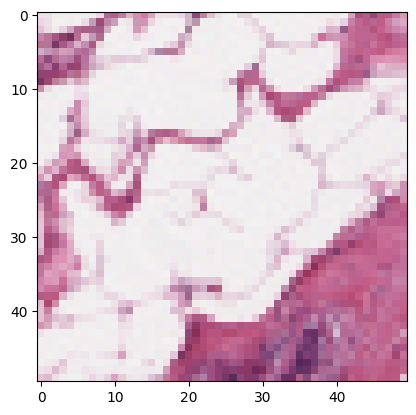

Predicted :  t e n s o r ( 0 )
epoch 2 loss 0.001328125


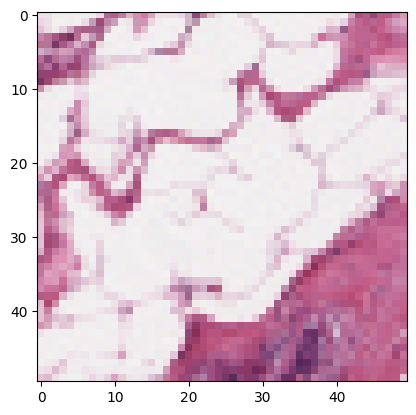

Predicted :  t e n s o r ( 0 )
epoch 3 loss 0.00171875


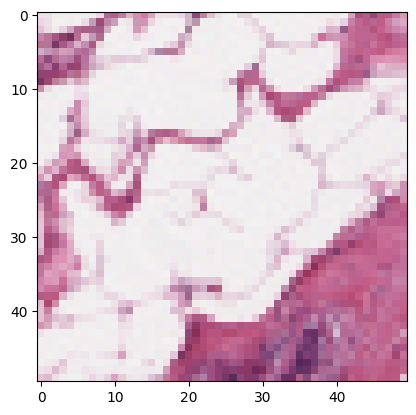

Predicted :  t e n s o r ( 0 )
epoch 4 loss 0.0009375


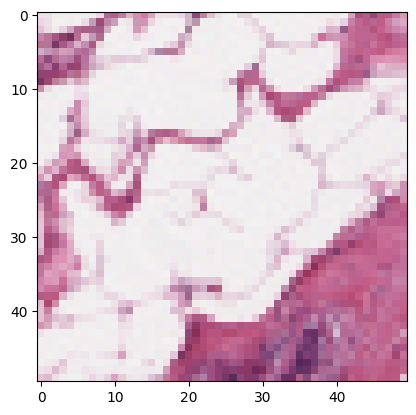

Predicted :  t e n s o r ( 0 )
epoch 5 loss 0.00078125


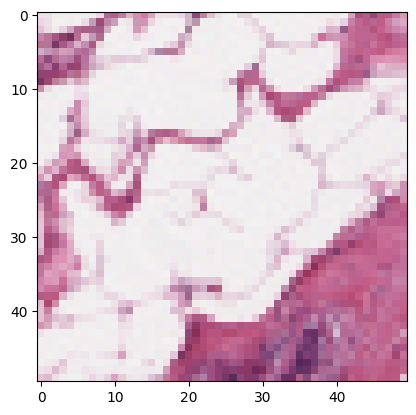

Predicted :  t e n s o r ( 0 )
epoch 6 loss 0.0015625


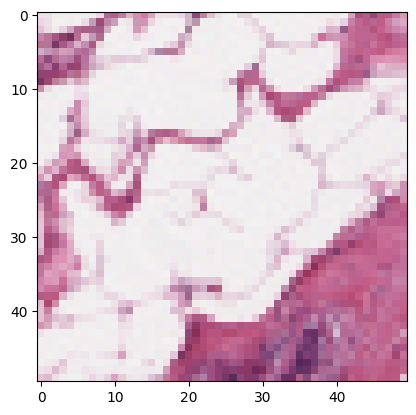

Predicted :  t e n s o r ( 0 )
epoch 7 loss 0.00125


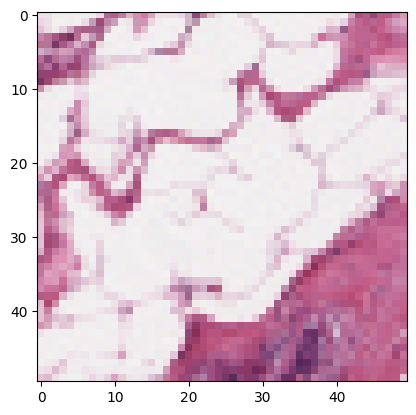

Predicted :  t e n s o r ( 0 )
epoch 8 loss 0.0015625


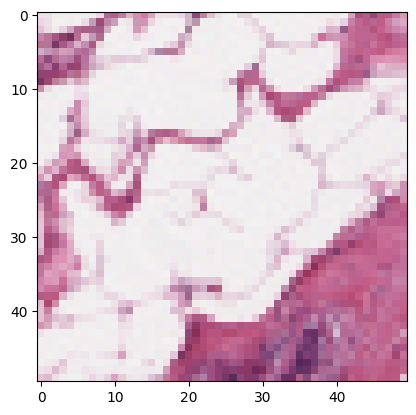

Predicted :  t e n s o r ( 0 )
epoch 9 loss 0.00140625


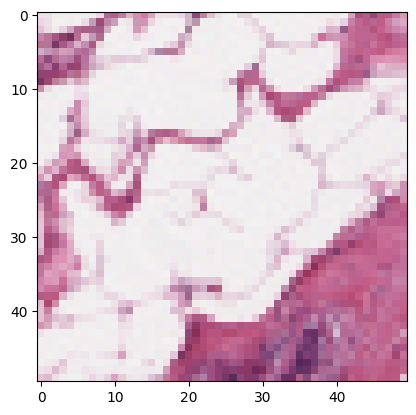

Predicted :  t e n s o r ( 0 )
epoch 10 loss 0.001640625


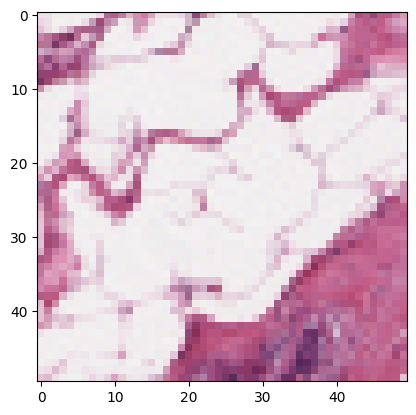

Predicted :  t e n s o r ( 0 )
Training finished


In [ ]:
criterion = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001)
test_data_iter = iter(testloader)
test_images, test_labels = next(dataiter)
for epoch in range(10):
  running_loss = 0
  for i, data in enumerate(trainloader, 0):
    input_imgs, labels = data
    input_imgs = input_imgs.to(device)
    labels = labels.to(device)
    optimizer.zero_grad()
    outputs = net(input_imgs)
    labels = labels.unsqueeze(1).float()
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    #printing stats and checking prediction as we train
    running_loss += loss.item()
    if i % 10000 == 0:
      print('epoch', epoch+1, 'loss', running_loss/10000)
      imshow(torchvision.utils.make_grid(test_images[0].detach()))
      test_out = net(test_images.to(device))
      _, predicted_out = torch.max(test_out, 1)
      print('Predicted : ', ' '.join('%5s' % predicted_out[0]))
print('Training finished')

14. Testing the trained model and calculating the accuracy 

In [ ]:
correct = 0
total = 0
with torch.no_grad():
  for data in testloader:
    test_images, test_labels = data
    test_out = net(test_images.to(device))
    _, predicted = torch.max(test_out.data, 1)
    total += test_labels.size(0)
    for _id, out_pred in enumerate(predicted):
      if int(out_pred) == int(test_labels[_id]):
        correct += 1

print('Accuracy of the network on the 44252 test images: %d %%' % (
        100 * correct / total))

<ipython-input-8-93b67564b36b>:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(x)


Accuracy of the network on the 44252 test images: 84 %
